In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Non-linear Regression

In [3]:
x = np.linspace(0, 10, 100)
y = np.exp(x)

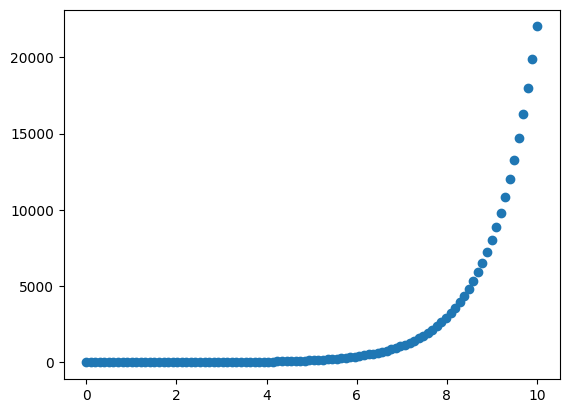

In [4]:
plt.scatter(x, y)

y^ = θ + θ1 * θ2^x

- Exponantial
- Quadratic
- Cubic
- ...

### Non-linear regression
- non-linear relationship between the dependet variable and a set of independent variables
- For a model to be considered non-linear y^ must be a non-linear function of the paramaters θ, not necessarily the features of x.
- in Non-linear regression, a model is non-linear by parameters.

How can I know if a problem is linear or non-linear?
- Visually figure out relation
- Calculate the correlation coefficient between independet and dependent variables
    - if for all variables it is 0.7 or higher there is a linearity, and it's not appropriate to fit a non-linear regression.


How should I model my data, if it displays non-linear on a scatterplot?
- Polynomial regression
- Non-linear regression model
- Transform your data

### Polynomial Regression

y^ = θ0 + θ1 * x + θ2 * x^2 + θ3 * x^3

Polynomial regression is considered to be a special case of traditional multiple linear regression.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("data/FuelConsumption.csv")

In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

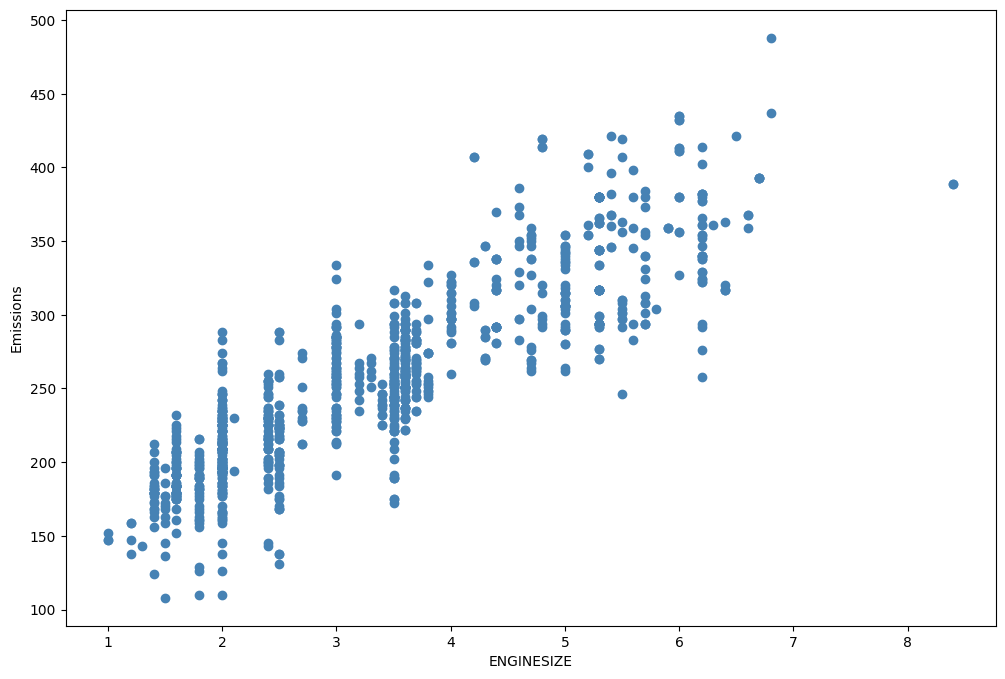

In [10]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = θ0 + θ1 x + θ2 x^2

In [14]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

In [15]:
poly = PolynomialFeatures(degree=2)

In [16]:
train_x_poly = poly.fit_transform(train_x)

In [17]:
print(train_x_poly)

[[ 1.    3.7  13.69]
 [ 1.    5.4  29.16]
 [ 1.    2.5   6.25]
 ...
 [ 1.    3.5  12.25]
 [ 1.    3.    9.  ]
 [ 1.    2.    4.  ]]


In [18]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [19]:
train_y_ = clf.fit(train_x_poly, train_y)

In [20]:
# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         50.60182992 -1.49947283]]
Intercept: [106.80896893]


y^ = θ0 + θ1 * x + θ2 * x^2

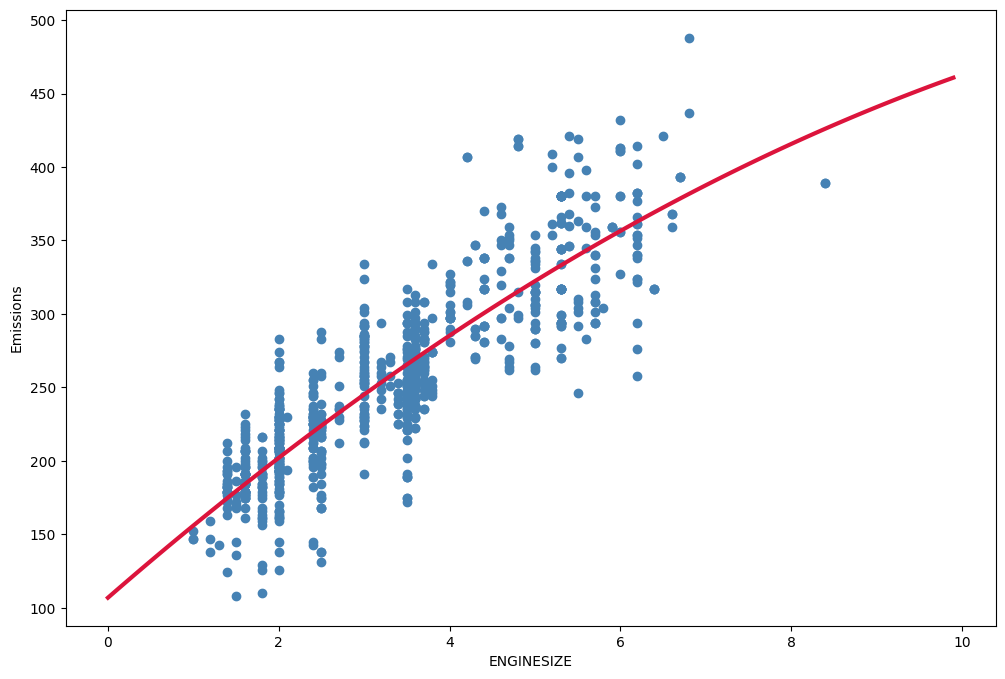

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)

plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

### Evaluation

In [23]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

In [24]:
print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

Mean Absolute Error (MAE): 22.01
Mean Squared Error (MSE): 799.70
R2-Score: 0.79


In [25]:
poly3 = PolynomialFeatures(degree=3)
train_x_3 = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_3, train_y)

In [26]:
# The coefficients
print("Coefficients:", clf3.coef_)
print("Intercept:", clf3.intercept_)

Coefficients: [[ 0.         26.5367309   5.10356914 -0.54461087]]
Intercept: [132.4218363]
